## Data Wrangling for Google PlayStore App dataset

In [1]:
import pandas as pd
app=pd.read_csv('googleplaystore.csv')
review=pd.read_csv('googleplaystore_user_reviews.csv')
print(review.head())
print(review.shape)
print(review.columns)
print(review.info())
print(len(app.Rating))

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
(64295, 5)
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Ra

It seems that there are missing values in many of the columns of the first dataset. The columns include rating, type, 
content rating, current ver and android ver. Missing values are also observed in the second dataset, in columns: Translated_Review, Sentiment, Sentiment_Polarity
and Sentiment_Subjectivity.

In [2]:
## For app dataset, rows with missing value (NaN) will be removed and for review dataset, rows with missing values in 
## setiment will be removed. 
new_app=app.dropna(axis=0, how='any')
new_app=new_app.drop_duplicates('App')
new_rev=review.dropna(axis=0, how='any')
print(new_app.info())
print(new_rev.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
App               8190 non-null object
Category          8190 non-null object
Rating            8190 non-null float64
Reviews           8190 non-null object
Size              8190 non-null object
Installs          8190 non-null object
Type              8190 non-null object
Price             8190 non-null object
Content Rating    8190 non-null object
Genres            8190 non-null object
Last Updated      8190 non-null object
Current Ver       8190 non-null object
Android Ver       8190 non-null object
dtypes: float64(1), object(12)
memory usage: 895.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity 

In [3]:
## Assert that there is no missing value:
assert pd.notnull(new_app).all().all()
assert pd.notnull(new_rev).all().all()

In [4]:
## Assert that all ratings in new_app are above 0:
assert (new_app['Rating']>0).all().all()

Now both original datasets have been cleaned up to remove missing values and the revised datasets are good to use for 
analysis.

The next step is to check outliers of Ratings, Sentiment_Polarity and Sentiment_Subjectivity from App and Review datasets.First, we want to identify what kinds of distribution each of these three data follows.

Begin with Rating data.

In [5]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(3,2,figsize=(15,15))
plt.subplot(3, 2, 1)
new_app['Rating'].plot(kind='hist', title='Ratings')
plt.subplot(3, 2, 2)
new_app['Rating'].plot(kind='box')
plt.subplot(3, 2, 3)
new_rev['Sentiment_Polarity'].plot(kind='hist', title='Sentiment_Polarity')
plt.subplot(3, 2, 4)
new_rev['Sentiment_Polarity'].plot(kind='box')
plt.subplot(3, 2, 5)
new_rev['Sentiment_Subjectivity'].plot(kind='hist', title='Sentiment_Subjectivity')
plt.subplot(3, 2, 6)
new_rev['Sentiment_Subjectivity'].plot(kind='box')

plt.show()

<Figure size 1500x1500 with 6 Axes>

It looks like the Rating data is not normally distributed. Instead, the Rating data seems to be left-skewed. We will try to log-transform the data into log(Rating).

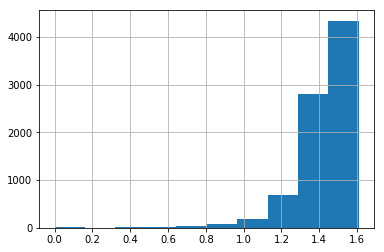

In [6]:
import numpy as np
new_app['Rating'].apply(np.log).hist()

It turned out the log transformation is not a solution to Rating data. Now, let's try exponential transformation on Rating data:

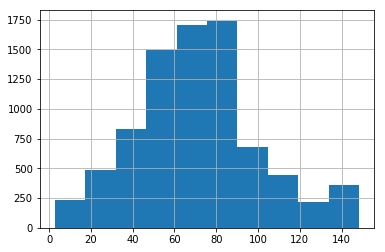

In [7]:
new_app['Rating'].apply(np.exp).hist()

The exponentially transformed Rating data follows normal distribution. Now, let's check if there is any outlier in the transformed Rating data:

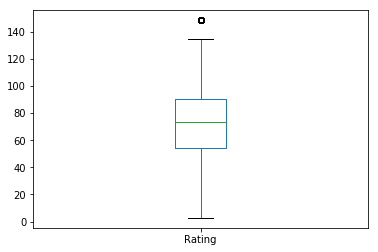

In [8]:
new_app['Rating'].apply(np.exp).plot(kind='box')
plt.show()

It turned out there is indeed outlier in the transformed Rating data. We need to identify this(these) data point(s) before making decision on whether to remove the outliers. The next step is to identify the outlier. 

In [9]:
## Add the transformed Rating data to the dataset, and name it exp_rating.
new_app['exp_rating']=new_app['Rating'].apply(np.exp)

## Define a function to locate outliers: the theory is to find data with difference from sample mean bigger than twice
## the standard deviation
def locate_outliers(data,n):
    return data[abs(data[n] - np.mean(data[n])) > 2 * np.std(data[n])]

In [10]:
locate_outliers(new_app,'exp_rating').head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_rating
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 18, 2018",1.7.1,4.0 and up,134.28978
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,134.28978
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2 and up,134.28978
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,38M,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 15, 2018",8.31,4.1 and up,134.28978
99,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,14M,"1,000,000+",Free,0,Everyone,Beauty,"November 9, 2017",2.3.0,4.1 and up,134.28978


As we can see from the above table, these suspected outliers dont seem to be not 'wrong' or false input. These ratings are independent from each other and without seeing the detailed review on these apps, there is no strong reason to exclude them. Next, we will locate the 'outliers' for sentiment_polarity data:

In [11]:
locate_outliers(new_rev,'Sentiment_Polarity').head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
13,10 Best Foods for You,Greatest ever Completely awesome maintain heal...,Positive,0.992188,0.866667
19,10 Best Foods for You,One greatest apps.,Positive,1.000000,1.000000


Again, these polarity ratings seem valid, and there is no strong reason to exclude them. Therefore, the detected outliers in App rating and sentiment polarity data will not be excluded in further analysis.

The next data cleaning steps include:1. datetime parsing 2. remove faulty App size 3.remove dollar signs 4. remove megabite signs 5. remove '+' sign in installs

In [12]:
##1. datetime parsing 
from datetime import datetime
new_app[ 'Last Updated' ]=[datetime.strptime(x, '%B %d, %Y') for x in new_app[ 'Last Updated' ]]
print(new_app.head(5))

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art

During this data cleaning step, abnormal input in App Size is also observed, with non-numerical value of 'Varies with device'. Therefore, the rows with  Size= 'Varies with device' will be removed.

In [13]:
##2. remove faulty App size
new_app = new_app[new_app.Size!= 'Varies with device']

In [14]:
##3.remove dollar signs
new_app[ 'Price' ]=[float(x.strip('$')) for x in new_app.Price]

In [15]:
##4. remove megabyte signs and kilobyte sign
new_app['Size']=[x.strip('M') for x in new_app.Size]
new_app.Size=[float(x.strip('k'))/1000 if 'k' in x else float(x) for x in new_app.Size]

In [16]:
##5. remove '+' sign in installs and convert string to integer for Review column
new_app[ 'Installs' ]=[x.strip('+')for x in new_app.Installs]
new_app[ 'Reviews' ]=[int(x)for x in new_app.Reviews]
new_app[ 'Installs' ]=[int(x.replace(',','')) if ',' in x else int(x) for x in new_app.Installs]
print(new_app.head(5))
print(new_app.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up   
1  Art & Des

All of the numeric data has been converted to numeric values for further analysis.

# Exploratory Data Interpretation

### 1. First, we will look into the potential relationship between app ratings and app installs.

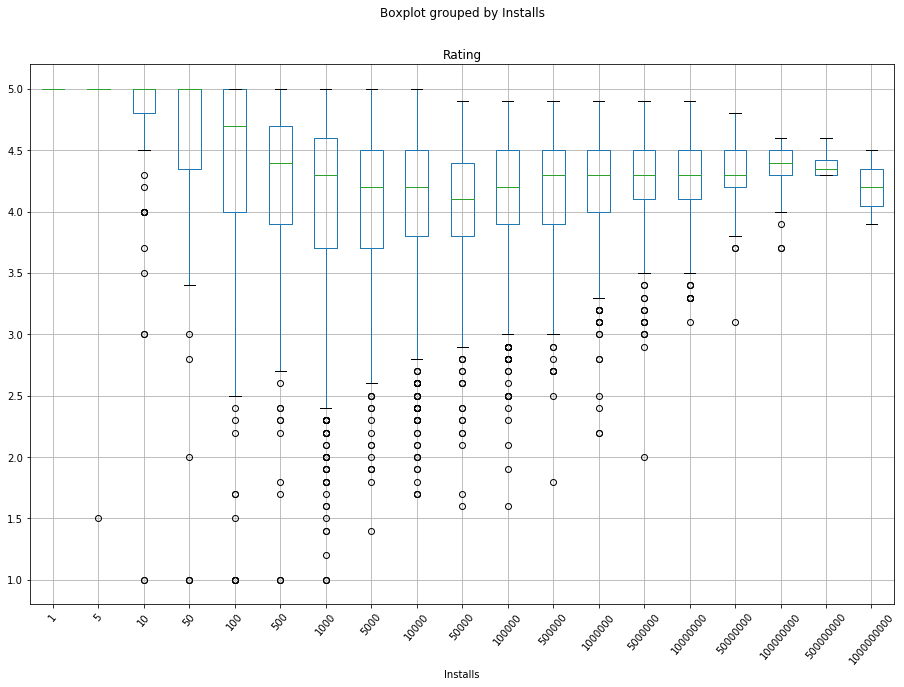

In [17]:
import matplotlib.pyplot as plt
boxplt1=new_app.boxplot(column=['Rating'], by='Installs', figsize=(15,10), rot=50)


As we can se from the plot, the mean of the app ratings did not change significantly with the number of installs.

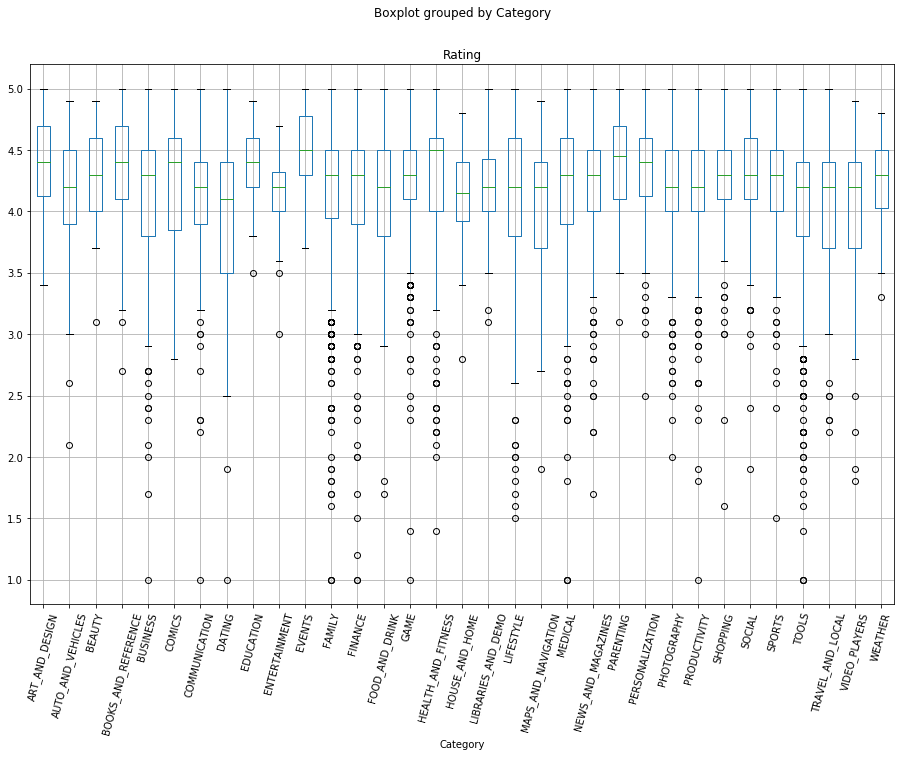

In [18]:
boxplt3=new_app.boxplot(column=['Rating'], by='Category', figsize=(15,10), rot=75)

There is no significant rating difference among App Category.
Now, let's take a look if the average app rating changes with the installs.

Text(0.5, 1.0, 'Average rating vs. number of installs')

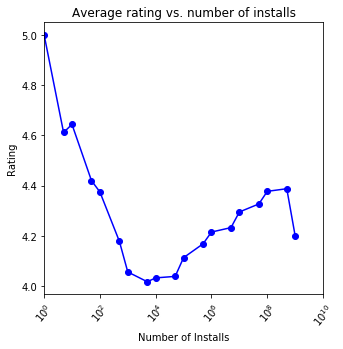

In [19]:
fig, ax = plt.subplots(figsize=(5,5))
new_app.set_index('Installs')
new_app.groupby(['Installs']).mean()['Rating'].plot(kind='line', ax=ax, rot=50, marker='o', color='b')
x_label=new_app['Installs'].unique()
ax.set_xticks(x_label)
ax.set_xscale('log')
plt.xlim(1,10000000000)
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.title('Average rating vs. number of installs')

The ratings of the app initially decline with the number of installs, for apps with 1 to 10000 installs. We may classify these apps as 'unpopular apps'. For the 'popular apps' with above 10000 times installs, the average app rating goes up with installs, then suddenly declines with installs when the installs hit above 10 million times.

So what is the most donwloaded app on Google Play Store?

In [20]:
new_app.sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_rating
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,90.017131
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13.0,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,49.402449
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,500000000,Free,0.0,Everyone,Casual,2018-07-05,1.129.0.2,4.1 and up,81.450869
3473,Dropbox,PRODUCTIVITY,4.4,1861310,61.0,500000000,Free,0.0,Everyone,Productivity,2018-08-01,Varies with device,Varies with device,81.450869
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11.0,500000000,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,73.699794
1661,Temple Run 2,GAME,4.3,8118609,62.0,500000000,Free,0.0,Everyone,Action,2018-07-05,1.49.1,4.0 and up,73.699794
1662,Pou,GAME,4.3,10485308,24.0,500000000,Free,0.0,Everyone,Casual,2018-05-25,1.4.77,4.0 and up,73.699794
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40.0,500000000,Free,0.0,Teen,Communication,2018-08-02,12.8.5.1121,4.0 and up,90.017131
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70.0,500000000,Free,0.0,Everyone,Health & Fitness,2018-07-31,5.17.2.009,5.0 and up,73.699794
3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693,17.0,500000000,Free,0.0,Everyone,Tools,2018-07-30,4.5.28_ww,4.1 and up,99.484316


The most downloaded apps are with above 1 billion downloads, followed by apps with over half a billion downloads. Most of them are under Game category or Tech related.

### 2. Now let's take a look into the general rating distribution and how each category/genre scores on ratings.

C:\Users\Hxia\AppData\Local\Continuum\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of App Rating')

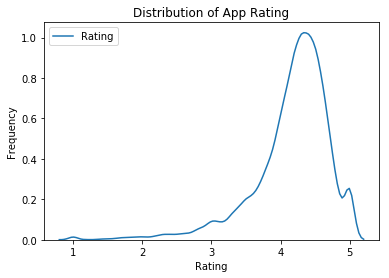

In [21]:
import seaborn as sns
dist = sns.kdeplot(new_app['Rating'])
dist.set_xlabel("Rating")
dist.set_ylabel("Frequency")
plt.title('Distribution of App Rating')

Majority of the apps have a rating of above 4.0. Some apps have really high ratings of >= 4.9, while some apps are rated below 2.0. We will dig into these top rated apps (of above 4.5) and see what genres they fall under.

Text(0.5, 1.0, 'Count of top rated apps in each category')

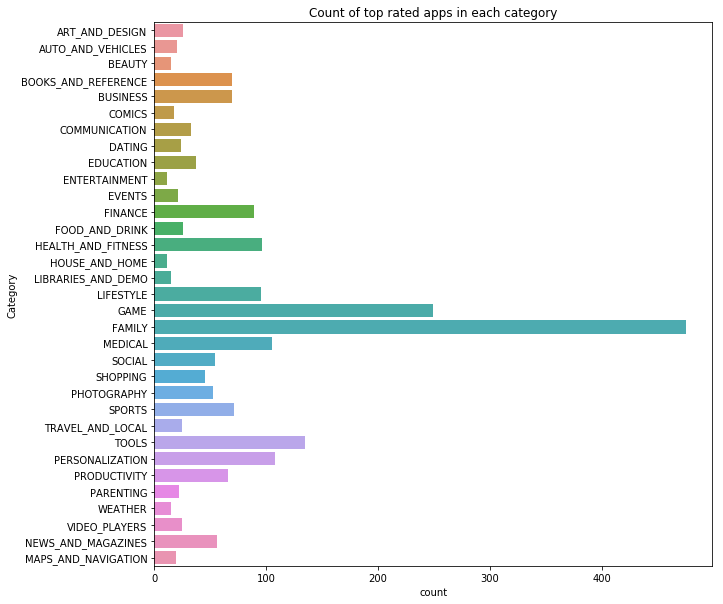

In [22]:
top_rate=new_app.loc[new_app['Rating'] >= 4.5, : ]
f, ax = plt.subplots(figsize=(10, 10))
toprate = sns.countplot(y="Category",data=top_rate)
plt.title('Count of top rated apps in each category')

As we can see from the plot, Family category apps have the most highly rated apps, followed by Game category, then Medical and Tool category.

So how many apps are in each of these categories and what is the percentage of highly rated apps for each category?

Text(0, 0.5, 'App Category')

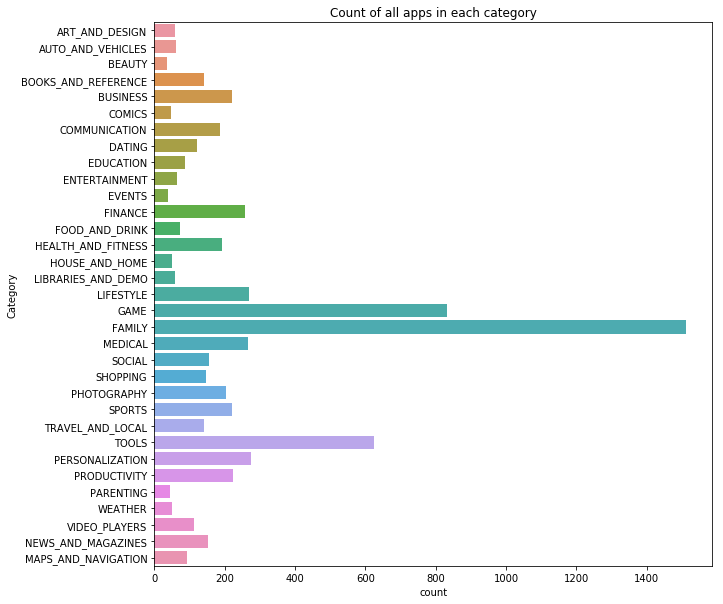

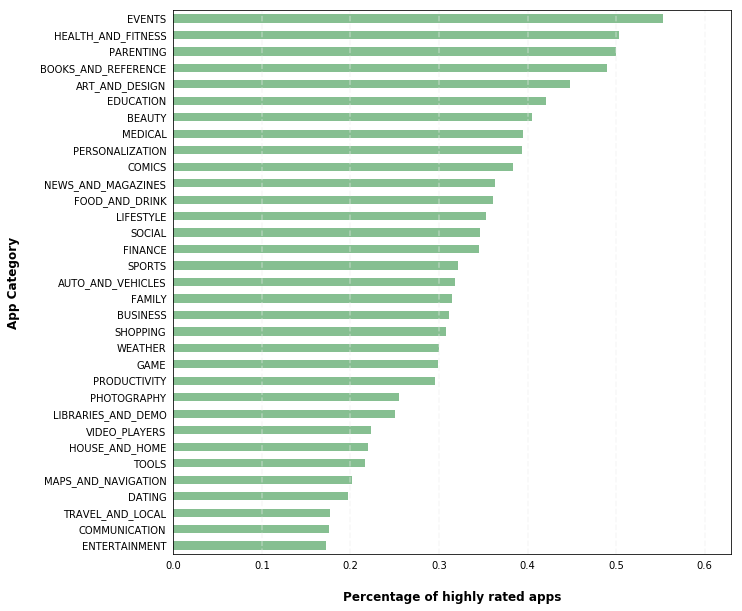

In [23]:
f, ax = plt.subplots(figsize=(10, 10))
count=sns.countplot(y="Category",data=new_app)
#count.set_xticklabels(count.get_xticklabels(), rotation=90)
plt.title('Count of all apps in each category')

top_perc=top_rate.groupby('Category').count()/new_app.groupby('Category').count()
percplt=top_perc.sort_values('App').plot(kind='barh', legend=False, figsize=(10, 10),color='#86bf91')
# Switch off ticks
percplt.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, 
                    labelleft=True)

# Draw vertical axis lines
vals = percplt.get_xticks()
for tick in vals:
    percplt.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
percplt.set_xlabel("Percentage of highly rated apps", labelpad=20, weight='bold', size=12)

# Set y-axis label
percplt.set_ylabel("App Category", labelpad=20, weight='bold', size=12)


It turns out that Family, Game and Tool categories also have the most apps, which explained why these three categories also have the most highly rated app. If we normalize the highly rated app nunmbers to the total app numbers, we can see that categories with the most percentage of highly rated apps are Event, Health and Fitness, then Parenting.

### 3. Price vs. Ratings

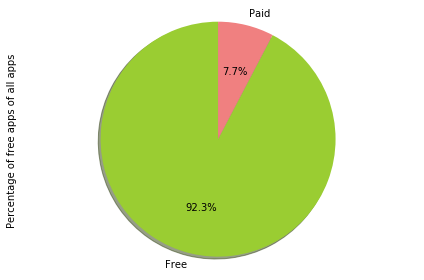

In [24]:
labels = ['Paid', 'Free']
sizes = new_app.groupby('Type').count()
colors = ['yellowgreen', 'lightcoral']
sizes['App'].plot(kind='pie', label= 'Percentage of free apps of all apps', colors=colors, 
                  shadow=True, startangle=90, autopct='%.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

92.5 % of the apps are free. 

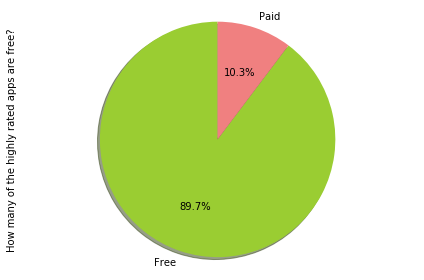

In [25]:
labels = ['Paid', 'Free']
sizes = top_rate.groupby('Type').count()
colors = ['yellowgreen', 'lightcoral']
sizes['App'].plot(kind='pie', label= 'How many of the highly rated apps are free?', 
                  colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

It turns out that 90% of the highly rated apps are free. Price is a potential key factor to a high rating.

Text(0.5, 1.0, 'Distribution of prices in apps')

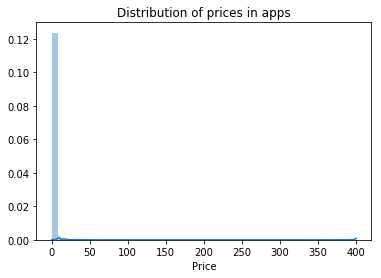

In [26]:
pricedist=sns.distplot(new_app['Price'])
pricedist.set_title('Distribution of prices in apps')

Majority of the app price is between 0 to 50 dollars.

LinregressResult(slope=-0.004897270218972686, intercept=4.2763596575518195, rvalue=-0.0436644427630724, pvalue=0.31893117272940374, stderr=0.0049089982764081875)

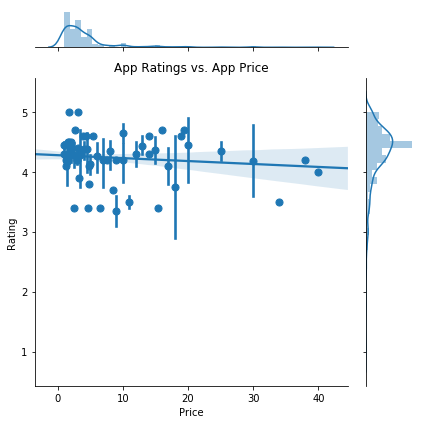

In [27]:
paid=new_app.loc[new_app['Price'] >0]
paid=paid.loc[paid['Price']<50]
price_reg=sns.jointplot(x="Price", y="Rating", data=paid, x_estimator=np.mean, kind='reg')
plt.title('App Ratings vs. App Price')
plt.tight_layout()
import scipy
scipy.stats.linregress(paid['Price'],paid['Rating'])

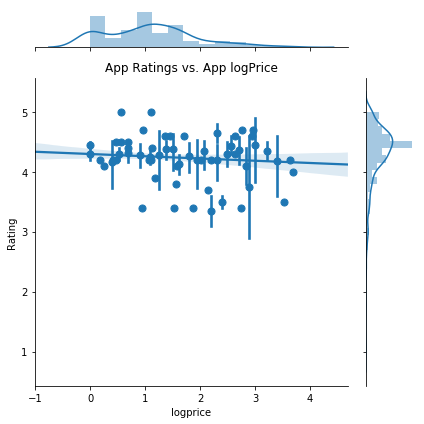

In [28]:
paid['logprice']=paid.Price.apply(np.log)
logprice_reg=sns.jointplot(x="logprice", y="Rating", data=paid, x_estimator=np.mean, kind='reg')
plt.title('App Ratings vs. App logPrice')
plt.tight_layout()

In [29]:
import scipy
scipy.stats.linregress(paid['logprice'],paid['Rating'])

LinregressResult(slope=-0.037361544932647546, intercept=4.295829386731296, rvalue=-0.05377894075230995, pvalue=0.21951194427071977, stderr=0.030392385074043855)

The log transformation did improve the correlation between price and ratings. It seems that there is a week and negative correlation between price and rating. The rating goes down with price.

### 4. Price vs installs

Text(0, 0.5, 'Price')

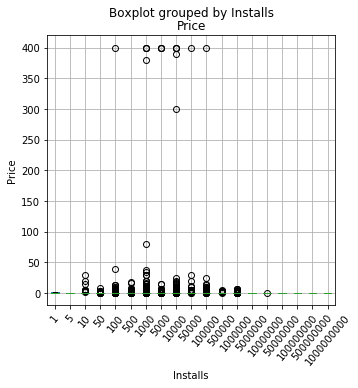

In [30]:
boxplt2=new_app.boxplot(column=['Price'], by='Installs', figsize=(5,5), rot=50)
plt.ylabel('Price')

The most downloaded apps are the apps free of charge.

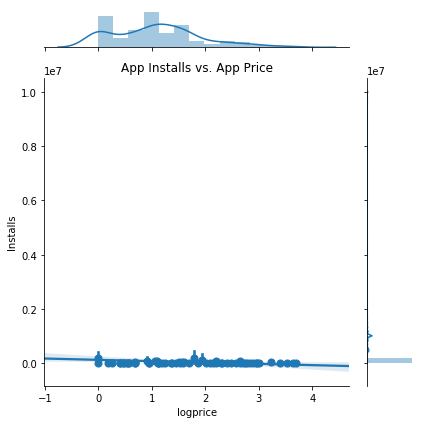

In [31]:
install_reg=sns.jointplot(x="logprice", y="Installs", data=paid, x_estimator=np.mean, kind='reg')
scipy.stats.linregress(paid['logprice'],paid['Installs'])
plt.title('App Installs vs. App Price')
plt.tight_layout()

From above plot, we can see there is also a week but significant correlation between price of app and download, meaning making the apps free or decreasing the app price can potentially attract more downloads.

### 5. Reviews and app size vs rating and installs

   Rating  Reviews  Size  Installs
0     4.1      159  19.0     10000
1     3.9      967  14.0    500000
2     4.7    87510   8.7   5000000
3     4.5   215644  25.0  50000000
4     4.3      967   2.8    100000


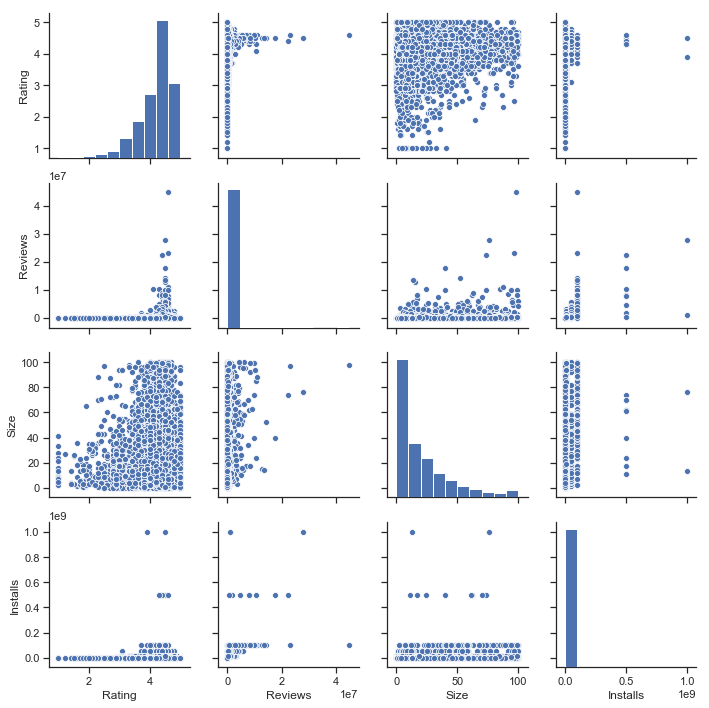

In [32]:
select=new_app[['Rating', 'Reviews', 'Size', 'Installs']]
print(select.head())
sns.set(style="ticks", color_codes=True)
pairsns=sns.pairplot(select)

Based on the above pairplots, it seems that there is no apparent correlation/regression among rating, review, app size and app installs. However, further regression and statistical analysis is performed to test these hypothesis.

#### Review vs. Rating

LinregressResult(slope=0.024394214717576863, intercept=3.982053289752914, rvalue=0.15630390790384124, pvalue=1.211827402320123e-39, stderr=0.0018399600775978336)

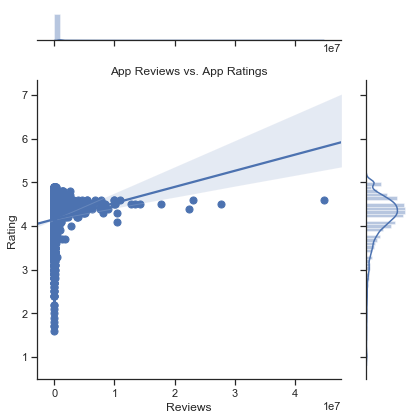

In [33]:
review_reg=sns.jointplot(x="Reviews", y="Rating", data=select, x_estimator=np.mean, kind='reg')
plt.title('App Reviews vs. App Ratings')
plt.tight_layout()
scipy.stats.linregress(select['Reviews'].apply(np.log),select['Rating'])

The statistical analysis suggests that there is a very weak positive correlation between the app review times and rating. Highly rated apps tend to have more reviews. 

#### Size vs. Rating

LinregressResult(slope=0.0015492628927878756, intercept=4.12697997226311, rvalue=0.06297241431297602, pvalue=1.2858649084914406e-07, stderr=0.0002930720073432804)

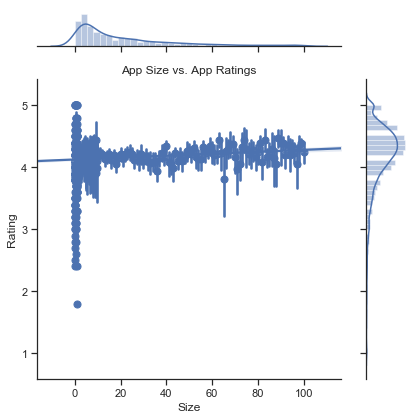

In [34]:
sns.jointplot(x="Size", y="Rating", data=select, x_estimator=np.mean, kind='reg')
plt.title('App Size vs. App Ratings')
plt.tight_layout()
scipy.stats.linregress(select['Size'],select['Rating'])

There is also a very weak positive correlation between the app size and rating. It is likely that the bigger the app, the more comprehensive and well-designed to win high ratings.

#### Installs vs. Rating

LinregressResult(slope=0.00921916502367544, intercept=4.056457626670439, rvalue=0.05914601676811682, pvalue=7.071583198210419e-07, stderr=0.0018572377318057242)

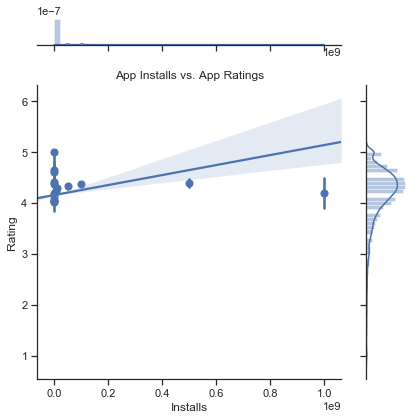

In [35]:
sns.jointplot(x="Installs", y="Rating", data=select, x_estimator=np.mean, kind='reg')
plt.title('App Installs vs. App Ratings')
plt.tight_layout()
scipy.stats.linregress(select['Installs'].apply(np.log),select['Rating'])

It also turns out that the more installs, the higher rating an app is likely to get. 

#### Size vs. Installs

LinregressResult(slope=0.04703675865326255, intercept=10.283654904124903, rvalue=0.2980085322457334, pvalue=5.66301821903563e-144, stderr=0.0017983563683761927)

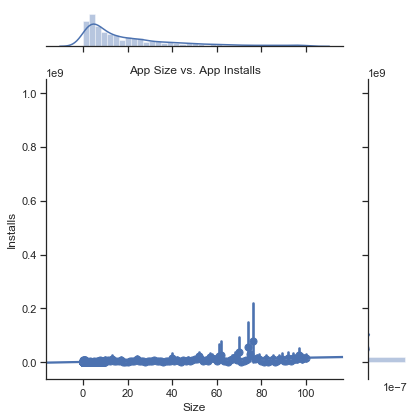

In [36]:
sns.jointplot(x="Size", y="Installs", data=select, x_estimator=np.mean, kind='reg')
plt.title('App Size vs. App Installs')
plt.tight_layout()
scipy.stats.linregress(select['Size'],select['Installs'].apply(np.log))

Bigger app, more installs.

#### Installs vs. Review

LinregressResult(slope=0.9486568388735294, intercept=-3.4034942371773624, rvalue=0.949861009409496, pvalue=0.0, stderr=0.003727357770870512)

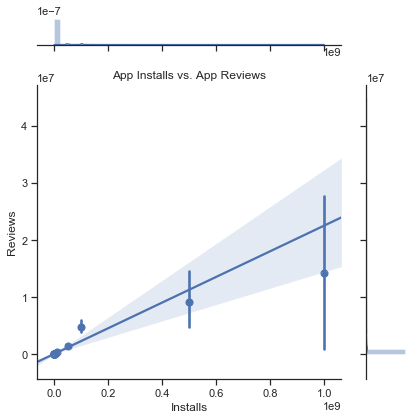

In [37]:
sns.jointplot(x="Installs", y="Reviews", data=select, x_estimator=np.mean, kind='reg')
plt.title('App Installs vs. App Reviews')
plt.tight_layout()
scipy.stats.linregress(select['Installs'].apply(np.log),select['Reviews'].apply(np.log))

And obviously, more installs lead to more reviews.

#### Size vs. Review

LinregressResult(slope=0.05343175921468339, intercept=6.160392992266437, rvalue=0.3389547343404442, pvalue=2.7193981796989594e-188, stderr=0.0017701851577793667)

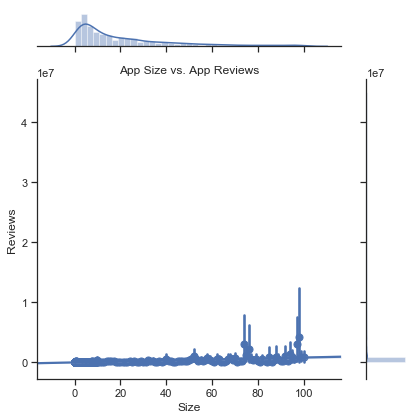

In [38]:
sns.jointplot(x="Size", y="Reviews", data=select, x_estimator=np.mean, kind='reg')
plt.title('App Size vs. App Reviews')
plt.tight_layout()
scipy.stats.linregress(select['Size'],select['Reviews'].apply(np.log))

Also, bigger apps have more reviews.

### 6. Data exploration for Review dataset

In [39]:
new_app=new_app.drop_duplicates('App')
new_rev.info()
new_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 10840
Data columns (total 14 columns):
App               7021 non-null object
Category          7021 non-null object
Rating            7021 non-null float64
Reviews           7021 non-null int64
Size              7021 non-null float64
Installs          7021 non-null int64
Type              7021 non-null object
Price             7021 non-null float64
Content Rating    7021 non-null object
Genres            7021 non-null object
Last Updated      7021 non-null datetime64[ns]
Current Ver       7021 non-null object
Android Ver  

In [40]:
new_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


Two datasets are merged on shared column 'App'. The merged dataset is named as merge.

In [41]:
merge=pd.merge(new_rev, new_app, on='App', how='left')
print(merge.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 37426
Data columns (total 18 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
Category                  24069 non-null object
Rating                    24069 non-null float64
Reviews                   24069 non-null float64
Size                      24069 non-null float64
Installs                  24069 non-null float64
Type                      24069 non-null object
Price                     24069 non-null float64
Content Rating            24069 non-null object
Genres                    24069 non-null object
Last Updated              24069 non-null datetime64[ns]
Current Ver               24069 non-null object
Android Ver               24069 non-null object
exp_rating                24069 non-null float64
dtypes: dat

In [42]:
merge.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_rating
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,54.59815
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,54.59815
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,54.59815
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,54.59815
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,54.59815


In the merge dataset, Sentiment_Polarity describes how strong a positive or negative the review is. And the Sentiment_Subjectivity describes how subjective the review opinion is. The lower subjectivity the review has, the more un-biased the review is, and the more reliable the review is supposedly to be. So both sentiment polarity and subjectivity can be potentially used to predict the app rating.

### 7. Sentiment Polarity and Subjectivity Distribution

Text(0.5, 1.0, 'Sentiment Polarity Density Plot')

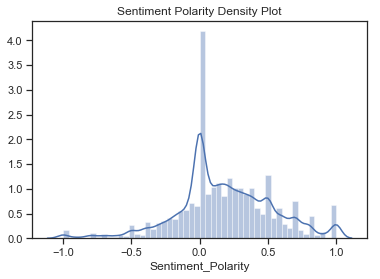

In [43]:
sns.distplot(merge['Sentiment_Polarity'])
plt.title('Sentiment Polarity Density Plot')

It seems that most of the reviews tend to be positive than negative. And the reviews dominantly fall between barely to slightly positive than highly positive or highly negative. There is also a spike at 0.0. This could be due to the imperfection of the natural language process: people use drastically inconsistent and versatile words and phrases to express their emotions and opinions, it is very likely that the vocabulary used during the natural language process is insufficient to correctly identify the true polarity of the review. Therefore, many reviews may not be properly processed and labeld with low polarity.

Text(0.5, 1.0, 'Sentiment Subjectivity Density Plot')

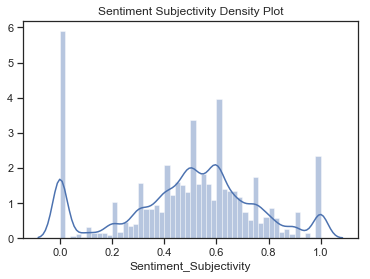

In [44]:
sns.distplot(merge['Sentiment_Subjectivity'])
plt.title('Sentiment Subjectivity Density Plot')

The majority of the subjectivity scores falls between 0.2 and 0.8 (very subjective to very onjective). And there are also two spikes (extremely subjective and extremely subjective) observed at 0.0 and 1.0. The vocabulary insufficiency issue could also occur in the subjectivity analysis process.   

Text(0.5, 1.0, 'Distribution of Polarity in each category')

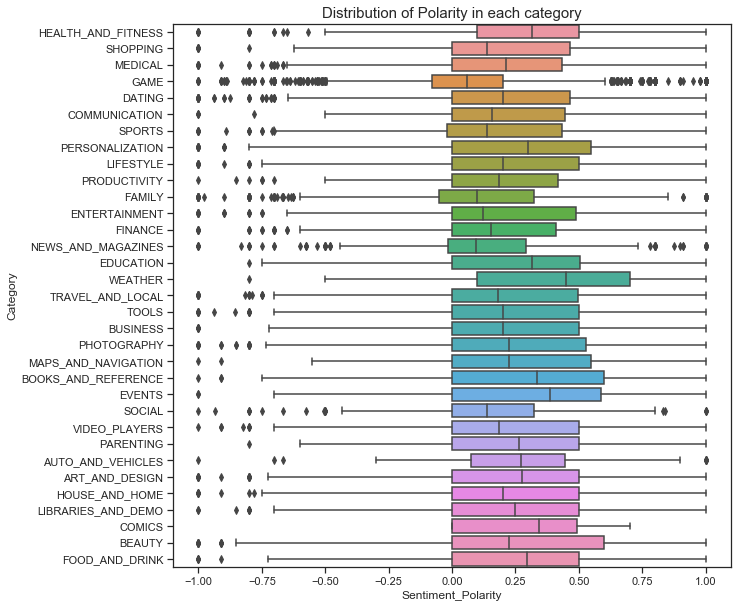

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
box4=sns.boxplot(x='Sentiment_Polarity', y="Category", data=merge)
#box4.set_xticklabels(box4.get_xticklabels(), rotation=90)
plt.title('Distribution of Polarity in each category', fontsize=15)


Game, News and magzine, and Social apps have the smallest polarity ranges and most outliers, and their reviews tend to be neutral and mildly positive. Weather, personalization, books and beauty apps have the widest polarity ranges and least outliers, with whose reviews being dominantly mildly positive to positive.

Text(0.5, 1.0, 'Distribution of Subjectivity in each category')

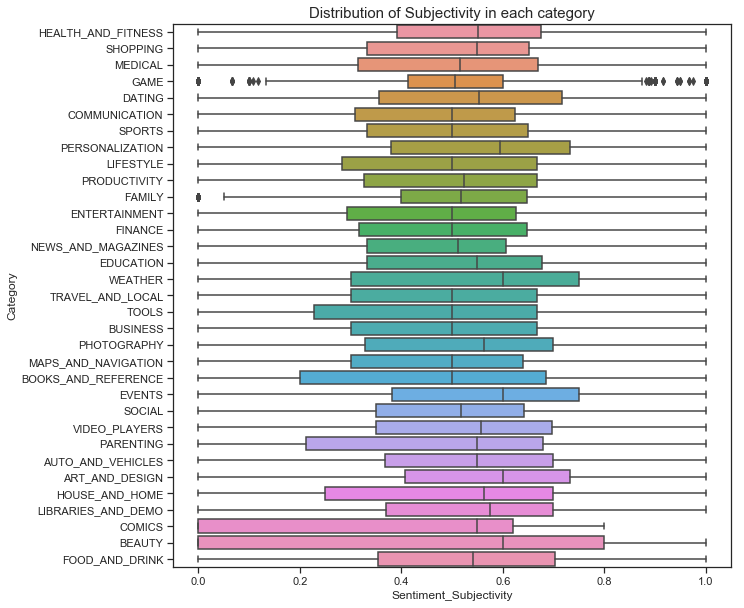

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
box4=sns.boxplot(x='Sentiment_Subjectivity', y="Category", data=merge)
#box4.set_xticklabels(box4.get_xticklabels(), rotation=90)
plt.title('Distribution of Subjectivity in each category', fontsize=15)


For most app categories, the reviews are moderately subjective, and lie between 0.3 to 0.7. Two categories,Beauty and Comics have the widest subjectivity range, from extremely objective (0.0) to fairly subjective (0.8). The apps under these two categories are more likely to recieve objective reviews than the rest.

### 8. App Sentiment Polarity and Subjectivity vs. Rating

In [47]:
ave_rating=merge.dropna(axis=0, how='any').groupby(by='App').mean()['Rating']
ave_polarity=merge.dropna(axis=0, how='any').groupby(by='App').mean()['Sentiment_Polarity']
ave_sub=merge.dropna(axis=0, how='any').groupby(by='App').mean()['Sentiment_Subjectivity']

#### Polarity vs. Rating

LinregressResult(slope=0.4925667059279767, intercept=4.1720337486930665, rvalue=0.24530786231456336, pvalue=3.137523012519902e-09, stderr=0.08182172806723405)

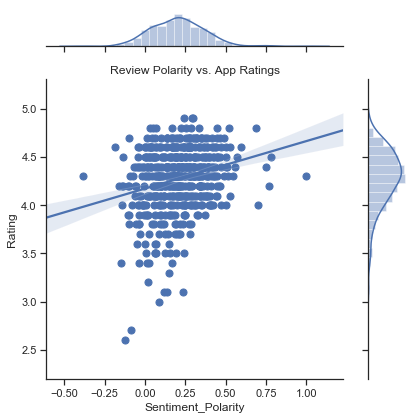

In [48]:
polarity_reg=sns.jointplot(ave_polarity,ave_rating, x_estimator=np.mean, kind='reg')
plt.title('Review Polarity vs. App Ratings')
plt.tight_layout()
scipy.stats.linregress(ave_polarity,ave_rating)

It looks like there is a strong positive correlation between review polarity and app ratings. The higher polarity, the higher ratings.

#### Subjectivity vs. Rating

LinregressResult(slope=0.8413215429188198, intercept=3.8578224093624955, rvalue=0.21427410623403859, pvalue=2.529693741546604e-07, stderr=0.16120481204821627)

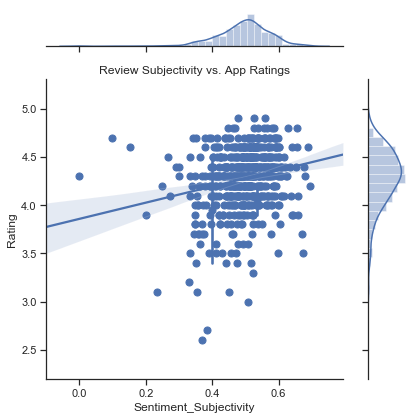

In [49]:
sub_reg=sns.jointplot(ave_sub, ave_rating, x_estimator=np.mean, kind='reg')
plt.title('Review Subjectivity vs. App Ratings')
plt.tight_layout()
scipy.stats.linregress(ave_sub, ave_rating)

Interestingly, review subjectivity is also positively correlated with app ratings. The higher subjectivity, the higher ratings.

### 9. Predicting rating using review polarity and subjectivity via multi linear regresssion

In [186]:
regdata=pd.DataFrame({'rating':ave_rating, 'sub':ave_sub, 'pola':ave_polarity})
x=regdata[['pola', 'sub']]
y=regdata[['rating']]

import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

model = smf.ols(formula='rating ~ pola + sub', data=regdata)
results_formula = model.fit()
results_formula.params

Intercept    3.889215
pola         0.400885
sub          0.611506
dtype: float64

The multi regression equation is : Rating = 3.889 + 0.4* Polarity + 0.61 * Subjectivity

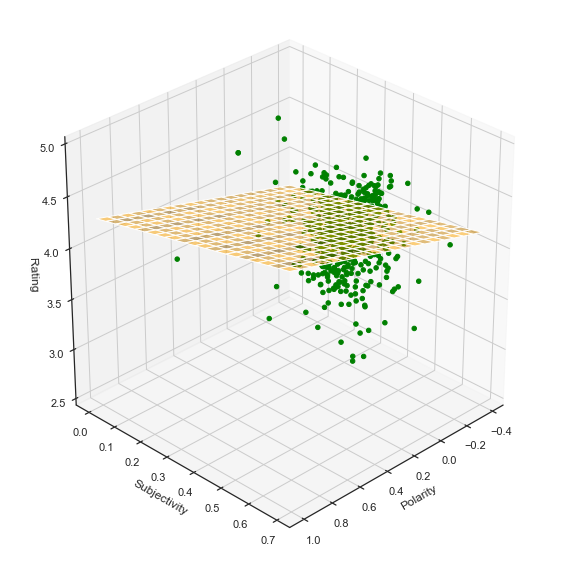

In [220]:
# Prepare the 3d plot.
x1_min=regdata.pola.min()
x1_max=regdata.pola.max()
x2_min=regdata['sub'].min()
x2_max=regdata['sub'].max()
x_surf, y_surf = np.meshgrid(np.linspace(x1_min, x1_max, 20),np.linspace(x2_min, x2_max, 20))
onlyX = pd.DataFrame({'pola': x_surf.ravel(), 'sub': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

fig = plt.figure(figsize=(8,8))
plt.rcParams['legend.fontsize'] = 10
ax = fig.add_subplot(111, projection='3d')
ax.scatter(regdata['pola'],regdata['sub'],regdata['rating'],c='green', marker='o', alpha=1)
ax.plot_surface(x_surf,y_surf,fittedY.values.reshape(x_surf.shape), color='orange', alpha=0.5)
ax.set_xlabel('Polarity')
ax.set_ylabel('Subjectivity')
ax.set_zlabel('Rating')
ax.view_init(30, 45)
plt.tight_layout()
plt.show()

In [200]:
y_pred = model.predict(x)
print('Coefficients: \n', lm.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred) + ' (1 is perfect prediction.)')


Coefficients: 
 [[0.40088506 0.61150633]]
Mean squared error: 0.10
Variance score: 0.08 (1 is perfect prediction.)


The multi linear regression equation: Rating = 3.889 + 0.4* Polarity + 0.61 * Subjectivity
did not provide very accurate prediction of App rating. Non-linear regression should be investigated for the next step. 